# <center> Numbers as data: A reintroduction </center>

## <center> ACE 592 </center>


We're mostly used to this category of data, so for this section we will mostly talk about the following, common issue with data analysis:

## My data is too big for my computer!
## WHAT DO I DO???

First of all, what is __big data__?

The three V's:
1. Velocity
    - Data is being collected in realtime and streamed in constantly.
    - Class example: our Twitter streaming API.
2. Variety
    - Data that is in the form of images or text (as an example).
    - Class example: our text data or image data.
3. Volume
    - The size of the data.
    - In this module we will finally talk about data that is truly __big__.

### Why this is important:
The practice of __data science__ involves knowing how to deal with data in all of its forms.

We have already seen variety and some velocity, so now let's look at volume.

__Knowing how to store and process data efficiently is absolutely crucial to workflow__.

### Data Processing Problem Solving:

In the next three weeks, we will discuss a range of data processing by focusing on how to fix our code when data processing either 1) does not fit into memory or 2) is too slow.

How we will usually approach it:
1. Map the problem.
2. Run through the checklist.
3. If nothing above works, get more memory!



__First things first__: sketch out what you are trying to do!

Why should we do this?

- Sometimes the solution is __not__ more memory, but rather __smarter code__!
- By thinking of all the steps and connecting them it can be easier to see where the bottlenecks are and how to fix them

__Second thing__:

Once you've done that, run through these questions:

1. Can we change the __data type__?
2. Can we __vectorize__ the operation?
3. Can the operation be __chunked__?
4. Can the operation be __parallelized__?
5. Can the operation be __distributed__?

__Last thing__:

Your last resort is to hop on a server.

Some options:
1. A mid-tier server, usually around 200 gigs of memory (usually shared with others).
    - Such servers are usually available in the Department.
2. A cluster, which has much more memory.
    - Available at the college or university level, but only accepts __batched__ commands.
3. A paid cloud computing service such as Google Cloud or AWS.
    - A good solution if you have a grant or external source to pay for it.

### Mapping the problem

Why is this important?
- Sometimes the solution is __not__ more memory, but rather __smarter code__!
- By thinking of all the steps and connecting them it can be easier to see where the bottlenecks are.
- Naturally can lead to you the solution.

### Example 1: Hub Distance
For a paper, I wanted to look at the effect of the __closest__ Production Credit Association, a type of credit institution, on crop yields for a given county.

Here's the data I have so far:
- County-level crop yields.
- A county shape file.
- A shapefile of the bank locations.
- Data about the banks.

How would I proceed?

#### For each step, let's specify:
- The inputs.
- The operations.
- The outputs.

#### Step 1: Find the closest bank to each county centroid.
How would I do this? Given a county centroid, I could calculate all the distances to all the different banks. Then I could sort the bank locations to find the one that has the smallest distance. I could then find the ID of the one with the smallest distance and assign that id to each county centroid.

Inputs:
- Bank locations
- County centroids

Operations:
- Centroid calculation.
- Distance calculation for each centroid.
- Value assign.

Outputs: 
- A correspondence between a county id and a bank id.

#### Step 2: Execute a merge between the datasets.

Would have to merge the correspondence to the county-level dataset, and then use this as the key to merge the datasets on.

Inputs:
- County data
- Bank data
- Correspondence

Operations:
- Merge

Outputs:
- Merged dataset.

#### What if you can't fit it in memory?
- Read each country centroid in to data and calculate distances.
- Then write out each distance matrix you calculate.

#### What if it takes way too long?
- Could theoretically parallelize this operation given that each draw is independent.

### Example 2: Pixel Counts

In your assignment, it took a lot of time to count pixels and took a lot of memory.

What's a better way?

#### Step 1: Split the raster into columns.

#### Step 2: Count the pixels in each column.

#### Step 3: Sum all the pixel counts together.

## Data Types
Our first line of defense against memory problems is defining what our data types are.

Recall that the more values a number can take, the more __bits__ it needs to store. The smallest data type would be a boolean (0 or 1) and the largest would be a 64 bit integer.

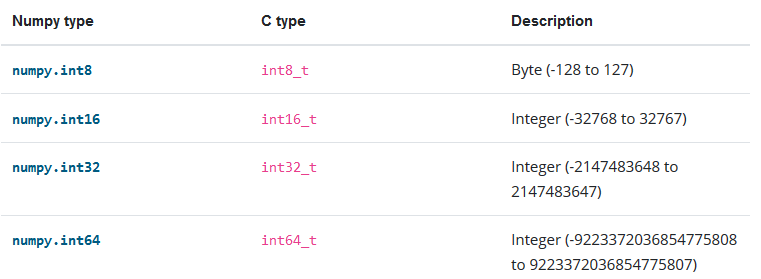

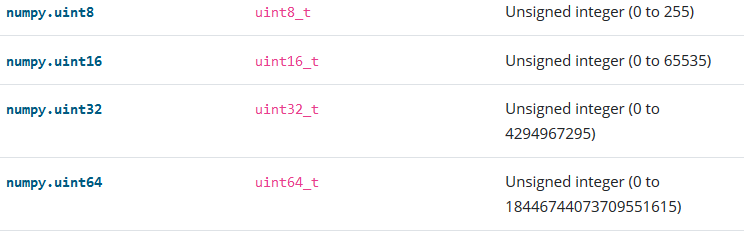

One thing you will notice about pandas is that it will automatically store things in the dataframe with 64 bits.

In [1]:
import pandas as pd
# 5 binary numbers, times 10 to the 5.
ex = pd.DataFrame([0,1,0,1,1,0]*10**5)
# Write to a csv file
ex.to_csv("ex_big.csv",index=False)
# But then look at the datatype!
ex.dtypes

0    int64
dtype: object

In [2]:
ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       600000 non-null  int64
dtypes: int64(1)
memory usage: 4.6 MB


In [3]:
# Save the memory usage
ex_64 = ex[0].memory_usage()

In [4]:
# Convert the first colum (column 0) to unsigned integer 8.
ex[0] = ex[0].astype("uint8")
# Write it out
ex.to_csv("ex_small.csv",index=False)
# Look at the data type
ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       600000 non-null  uint8
dtypes: uint8(1)
memory usage: 586.1 KB


In [5]:
# Memory usage
ex_8 = ex[0].memory_usage()

In [6]:
#Percent reduction in memory
(1-ex_8/ex_64)*100

87.49759381617007

An 87% reduction in memory usage just from changing one data type!

In [7]:
pd.read_csv("ex_small.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       600000 non-null  int64
dtypes: int64(1)
memory usage: 4.6 MB


Part of the pandas read_csv function always reads things in with 64 bits unless you tell it to otherwise. This is a common reason for bloated dataframes.

To get around this, you can specify a dtype in the read function.

In [8]:
pd.read_csv("ex_big.csv",dtype={0:"uint8"}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       600000 non-null  uint8
dtypes: uint8(1)
memory usage: 586.1 KB


Specifying a dictionary ahead of time can cut down on the memory footprint.

### Other types of data:
- `float`, which is what the data must be to store `np.nan` as missing values.
- `boolean`, which is similar to what we stored above.
- `datetime`, which represents dates.
- `category`, a special `pandas` object for variables with discrete levels.

An example dataset I have been looking at of traits of different dairy animals for sale.

In [3]:
data_dir="C:/Users/jhtchns2/Box/ACE_592_SAE/Class_Examples/3_Numeric/"
# This is a data set of dairy bulls and their genetic traits
df = pd.read_csv(data_dir + "naab_example.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/jhtchns2/Box/ACE_592_SAE/Class_Examples/3_Numeric/naab_example.csv'

In [ ]:
# First five rows
df.head()

In [4]:
df.info()

NameError: name 'df' is not defined

How can I reduce the memory footprint of this dataset?

### Downcasting Variables

The `pandas` function `to_numeric` will, given an object, reduce it to the smalles byte object possible with `downcast=variable_type`:

In [14]:
df.price

0         12.0
1         18.0
2         12.0
3         12.0
4         15.0
          ... 
150826     NaN
150827     NaN
150828     NaN
150829     NaN
150830    26.0
Name: price, Length: 150831, dtype: float64

What comes after the decimal place? If it's always zero, we can downcast to integer.

In [15]:
# Split on the period, taking the second element (what's after the period)
after_decimals = [str(x).split(".")[1] for x in df.price.dropna()]
# Value count what's after the period
pd.Series(after_decimals).value_counts()

0    97467
Name: count, dtype: int64

This is clearly just an integer. Let's try and downcast it:

In [16]:
# Downcast the integer with to_numeric
pd.to_numeric(df.price,downcast="integer")

0         12.0
1         18.0
2         12.0
3         12.0
4         15.0
          ... 
150826     NaN
150827     NaN
150828     NaN
150829     NaN
150830    26.0
Name: price, Length: 150831, dtype: float64

It didnt work! Why? 

Currently, pandas only supports missing values in floats and not in integers.

Two options:
1. Downcast to float.
2. Fill the missing values with another integer.

Float downcast:

In [17]:
# Downcast to float
p_float_dcast = pd.to_numeric(df.price,downcast="float")

In [18]:
# Ratio of memory usage
p_float_dcast.memory_usage()/df.price.memory_usage() 

0.5000546909958733

In [20]:
# Fillna with -1, downcast to integer
p_int_dcast = pd.to_numeric(df.price.fillna(-1),downcast="integer")
p_int_dcast.tail()

150826    -1
150827    -1
150828    -1
150829    -1
150830    26
Name: price, dtype: int16

In [21]:
p_int_dcast.memory_usage()/df.price.memory_usage() 

0.25008203649381

In [22]:
pd.DataFrame([df.price.memory_usage(),  # The original memory usage
              p_float_dcast.memory_usage(), # Downcast to float
              p_int_dcast.memory_usage()], # Downcast to integer (with fillna(-1))
             index=["Float64","Float32","Int16"], # Label rows
             columns=["Memory Usage"]) # # label column.

,Memory Usage
Float64,1206780
Float32,603456
Int16,301794


Notice that filling a missing value with an integer in this case can cut memory even more since it now only needs 16 bits to store it instead of 32.

The pro of filling is that you an reduce memory even more.

The con of filling is that you can accidentally run analysis without taking out your "fill value," in this case -1, which will cause problems with the analysis.

Downcast all my variables:

In [23]:
# Make a function that downcasts to float
def downcast(x):
    return pd.to_numeric(x,downcast="float")

# But only do the numeric columns (6 and onward)
df_num = df.iloc[:,6:]
# Apply that function across the axis=1
df_num_red = df_num.apply(downcast,axis=1)

In [24]:
df_num_red.memory_usage().sum()/df_num.memory_usage().sum()

0.500010939156412

Casting everything to float32 from float64 cut memory in half (which makes sense).

### Date Objects

On occasion, an `object` will take up less memory if it is converted to a datetime object. In this case, the birth date is exactly the same so there will be no memory savings.

But there could be memory savings if we saved this as an integer:

In [25]:
df['birth_date'].head(),df['birth_date'].memory_usage() 

(0    10/20/1991
 1     6/15/1992
 2     5/30/1992
 3     6/25/1992
 4    10/25/1992
 Name: birth_date, dtype: object,
 1206780)

In [26]:
df.birth_date.str.replace("/","").astype(int).head(),\
df.birth_date.str.replace("/","").astype(int).memory_usage()

(0    10201991
 1     6151992
 2     5301992
 3     6251992
 4    10251992
 Name: birth_date, dtype: int32,
 603456)

Memory footprint gets cut in half just by taking out slashes!

### Categories

One of these variables is a string that indicates the breed:

In [27]:
df.breed.head(),df.breed.memory_usage()

(0    AY
 1    AY
 2    AY
 3    AY
 4    AY
 Name: breed, dtype: object,
 1206780)

There are 14 unique values:

In [28]:
df.breed.nunique()

14

Which means this could benefit from the "category" object:

In [29]:
(1-df.breed.astype("category").memory_usage()/df.breed.memory_usage())*100

87.43507515868676

An 87% reduction in memory just from changing type!

Much like other programs like STATA, python is storing the labels and numbers separately and displaying them when necessary. The actual values it has been converted to are here:

In [30]:
df['breed_cat'] = df.breed.astype("category")

In [31]:
df['breed_cat'].cat.codes,df['breed_cat'].cat.codes.memory_usage()

(0          0
 1          0
 2          0
 3          0
 4          0
           ..
 150826    12
 150827    12
 150828    12
 150829    13
 150830    13
 Length: 150831, dtype: int8,
 150963)

Which is just an 8bit integer! No wonder it decreased the memory footprint so much...

Most of the memory savings here come from the fact that labels are repeated:

In [33]:
ABCD = pd.Series(["AAA","BBB","CCC"]*1)
print("Regular column takes {} bytes, category takes {} bytes".format(ABCD.memory_usage(), \
                                                                      ABCD.astype("category").memory_usage()))

Regular column takes 156 bytes, category takes 267 bytes


The category is bigger because it has to hold text labels as well as integers.

But if there are repeated labels, there will be memory savings:

In [34]:
ABCD = pd.Series(["AA","BB","CC"]*3)
print("Regular column takes {} bytes, category takes {} bytes".format(ABCD.memory_usage(), \
                                                                      ABCD.astype("category").memory_usage()))

Regular column takes 204 bytes, category takes 273 bytes


Text(0, 0.5, 'Memory Usage')

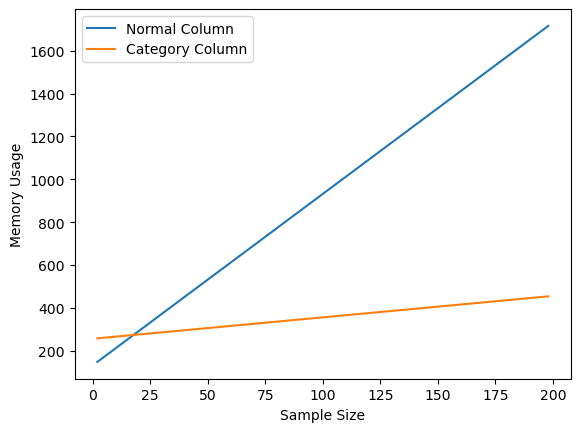

In [35]:
import matplotlib.pyplot as plt
import numpy as np
#
def show_mem_cat(x):
    #
    ABCD = pd.Series(["AAAAA","BBBBB"]*x)
    return [len(ABCD),ABCD.memory_usage(),ABCD.astype("category").memory_usage()]
#
mem_df = pd.DataFrame([show_mem_cat(x) for x in np.arange(1,100)]).set_index(0)
#
mem_df.columns= ['Normal Column',"Category Column"]

mem_df.plot()
plt.xlabel("Sample Size")
plt.ylabel("Memory Usage")

This reduces memory because pandas dataframes store all strings or columns with any strings as `objects` which typically take up the most memory.

By figuring out what ever datatype is, you can drastically decrease the memory footprint of your dataframe.

Let's try it:

In [2]:
base_mem = df.memory_usage().sum()
df.dtypes, base_mem

NameError: name 'df' is not defined

In [ ]:
#
type_dict = df.dtypes.to_dict()
#
for k,v in type_dict.items():
    if v==np.float64: #
        df[k] = pd.to_numeric(df[k],downcast="float")
    if v==np.int64: #
        df[k] = pd.to_numeric(df[k],downcast="integer")
    else:
        pass

In [ ]:
df.memory_usage().sum()

Better, but let's keep going.

In [ ]:
object_cols = list(df.dtypes[df.dtypes=="object"].index)

In [ ]:
object_cols

In [ ]:
df['breed'] = df['breed'].astype("category")
df['country_of_origin'] = df['country_of_origin'].astype("category")
df['eval_period'] = df['eval_period'].astype("category")

df['birth_date'] = pd.to_numeric(df['birth_date'].str.replace("/",""),downcast="integer")

In [ ]:
improved_mem = df.memory_usage().sum()

In [ ]:
(1-improved_mem/base_mem)*100

So we cut our memory footprint 61% just from doing variable changes. Not bad!

We could have gotten it even lower if we had downcast some of the floats which were actually integers using fill values.

#### Writing Data

How do we make sure that pandas retains these data types?

A few options for "serialized" data formats which sacrifice readibility for storability:
- __Pickle__, a serialized dataformat only used in python. Since its only in python its not great for across platform use.
- __Apache Parquet__, an Apache format which is under the __Hadoop__ umbrella.
- __HDF5__, which distributes the data as a file system (can be distributed across multiple machines).

HDF is a "hierarchical data format" format that works like a file format. It is good for files that have a natural hierarchy, and as such it can be stored across multiple machines.

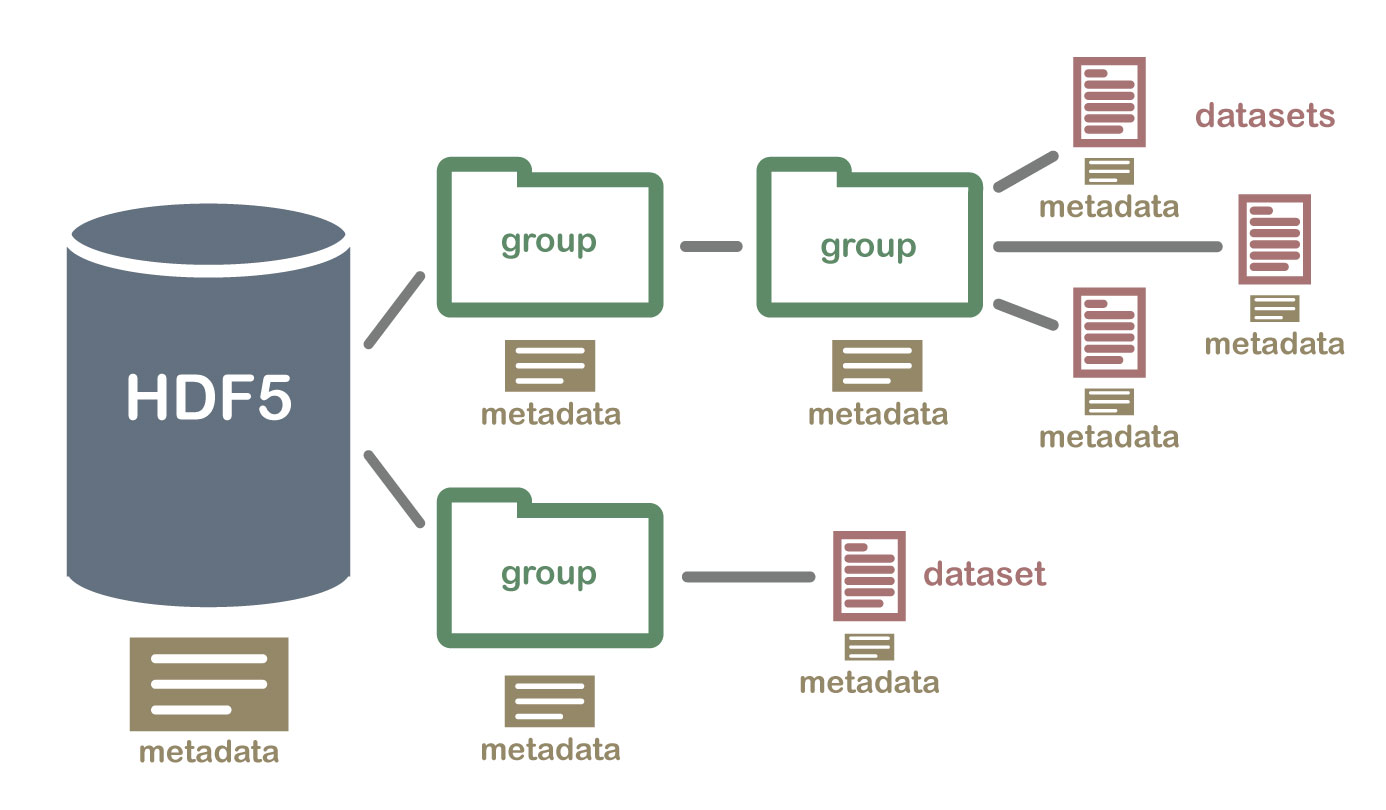

#### When should we use `csv`? 

Still a very useful format, especially because it almost near universally able to be read across machines.

Also can edit actual file as a text document which can be useful.

#### What about other formats?
Other formats will do a better job compressing the data so that it stays in the format you intend. 

For example, pickle format will keep all your integers as int8 if you specify it. The csv format will not.